In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
# import seaborn as sns

In [2]:
# def get_median_curve(data, mode='train', metric='loss', start_key=1, number_to_merge=5, decay=0.9):

#     curves = []
#     for i in range(start_key,start_key+number_to_merge):
#         unsmoothed = data[mode + '_' + metric + str(i)]
#         curves.append(unsmoothed[:])

#     curve = np.median(curves, axis=0)
    
#     ema = curve[0]
#     ema_list = []
#     for pt in curve:
#         ema = decay * ema + (1 - decay) * pt
#         ema_list.append(ema)

#     return ema_list

def get_median_curve(data, mode='train', metric='loss', start_key=1, number_to_merge=5, decay=0.9):

    curves = []
    for i in range(start_key,start_key+number_to_merge):
        unsmoothed = data[mode + '_' + metric + str(i)]
        
        ema = unsmoothed[0]
        ema_list = []
        for pt in unsmoothed:
            ema = decay * ema + (1 - decay) * pt
            ema_list.append(ema)
        curves.append(ema_list[:])
            
    return np.median(curves, axis=0)

In [7]:
def straight_line(d):
    data = d.copy()
    flag = False
    min_data = np.min(data)
    for i in range(len(data)):
        if abs(data[i] - min_data) < 1e-9:
            flag = True
        if flag:
            data[i] = min_data
    return data

In [3]:
gelu_data = pickle.load(open("./data/mnist_fcn_gelu.p", "rb"))
elu_data = pickle.load(open("./data/mnist_fcn_elu.p", "rb"))
relu_data = pickle.load(open("./data/mnist_fcn_relu.p", "rb"))

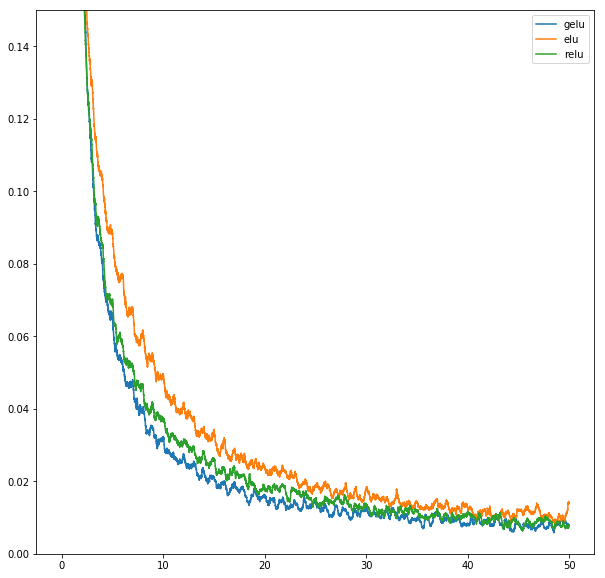

In [19]:
decay = 0.995
start = 1
first_point = 0
data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 50, len(data[first_point:])), data[first_point:])
data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
plt.plot(np.linspace(0, 50, len(data[first_point:])), data[first_point:])
data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
plt.plot(np.linspace(0, 50, len(data[first_point:])), data[first_point:])
plt.ylim((0,.15))
plt.legend(['gelu', 'elu', 'relu'])

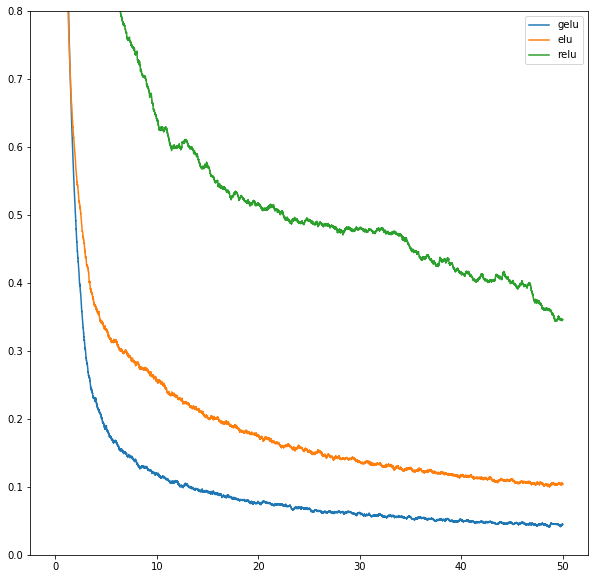

In [29]:
decay = 0.995
start = 16
first_point = 0
data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 50, len(data[first_point:])), data[first_point:])
data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
plt.plot(np.linspace(0, 50, len(data[first_point:])), data[first_point:])
data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
plt.plot(np.linspace(0, 50, len(data[first_point:])), data[first_point:])
plt.ylim((.0,.8))
plt.legend(['gelu', 'elu', 'relu'])

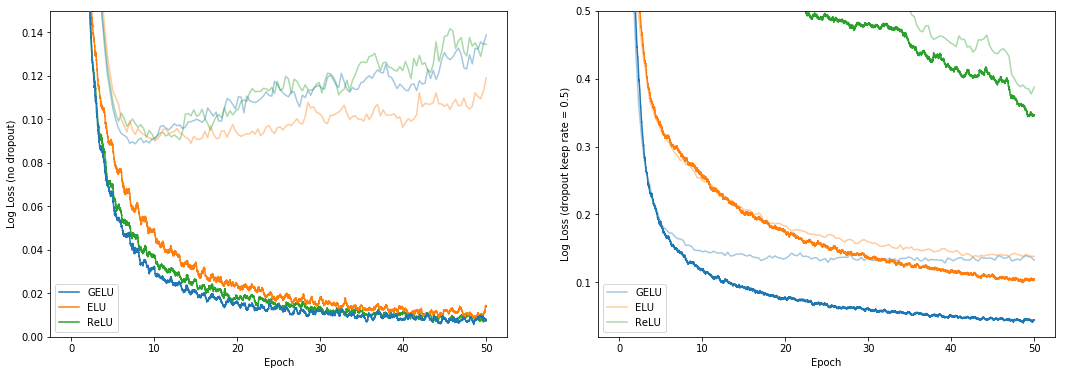

In [38]:
with PdfPages('mnist-classification.pdf') as pdf:
    fig = plt.figure(figsize=(18,6))
    
    plt.subplot(1,2,1)
    decay = 0.995
    start = 1
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=3)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=2)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=1)
    
    plt.gca().set_prop_cycle(None)
    
    decay = 0.7
    start = 1
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='val')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=3, alpha=0.4)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='val')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=2, alpha=0.4)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='val')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=1, alpha=0.4)
    plt.ylim((0,.15))
    plt.legend(['GELU', 'ELU', 'ReLU'])
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss (no dropout)')
    
    plt.subplot(1,2,2)
    
    decay = 0.5
    start = 16
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='val')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=2, alpha=0.4)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='val')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=3, alpha=0.4)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='val')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=1, alpha=0.4)
    
    plt.gca().set_prop_cycle(None)
    
    decay = 0.995
    start = 16
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=3)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=2)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=1)
    
    plt.ylim((0.02,.5))
    plt.legend(['GELU', 'ELU', 'ReLU'])
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss (dropout keep rate = 0.5)')
    
    
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

In [136]:
gelu_data = pickle.load(open("./data/twitter_pos_gelu.p", "rb"))
elu_data = pickle.load(open("./data/twitter_pos_elu.p", "rb"))
relu_data = pickle.load(open("./data/twitter_pos_relu.p", "rb"))

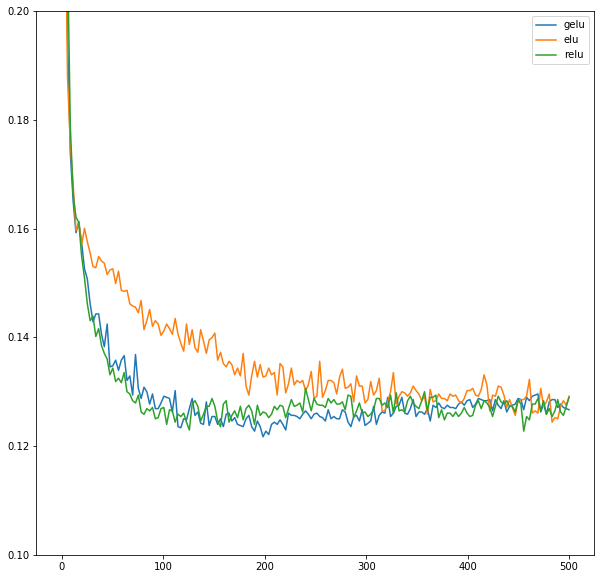

In [34]:
decay = 0.0
start = 1
first_point = 0
data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='val', metric='err')
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 500, len(data[first_point:])), data[first_point:])
data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='val', metric='err')
plt.plot(np.linspace(0, 500, len(data[first_point:])), data[first_point:])
data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='val', metric='err')
plt.plot(np.linspace(0, 500, len(data[first_point:])), data[first_point:])
plt.ylim((.1,.2))
plt.legend(['gelu', 'elu', 'relu'])

In [138]:
start = 1
data = get_median_curve(gelu_data, decay = 0, number_to_merge=5, start_key=start, mode='val', metric='err')
best = np.argmin(data)
data = get_median_curve(gelu_data, decay = 0, number_to_merge=5, start_key=start, mode='test', metric='err')
print(data[best])

data = get_median_curve(elu_data, decay = 0, number_to_merge=5, start_key=start, mode='val', metric='err')
best = np.argmin(data)
data = get_median_curve(elu_data, decay = 0, number_to_merge=5, start_key=start, mode='test', metric='err')
print(data[best])

data = get_median_curve(relu_data, decay = 0, number_to_merge=5, start_key=start, mode='val', metric='err')
best = np.argmin(data)
data = get_median_curve(relu_data, decay = 0, number_to_merge=5, start_key=start, mode='test', metric='err')
print(data[best])


0.125699102879
0.129054799676
0.126677840948


In [155]:
gelu_data = pickle.load(open("./data/mnist_ae_gelu.p", "rb"))
elu_data = pickle.load(open("./data/mnist_ae_elu.p", "rb"))
relu_data = pickle.load(open("./data/mnist_ae_relu.p", "rb"))

In [55]:
relu_data.keys()

dict_keys(['lr3', 'test_loss11', 'test_loss16', 'test_loss18', 'train_loss4', 'lr6', 'train_loss17', 'train_loss10', 'train_loss18', 'test_loss15', 'test_loss17', 'test_loss20', 'test_loss12', 'train_loss5', 'test_loss13', 'lr4', 'lr5', 'lr9', 'train_loss6', 'test_loss4', 'lr2', 'train_loss1', 'train_loss7', 'test_loss1', 'test_loss2', 'train_loss3', 'test_loss19', 'test_loss5', 'train_loss20', 'train_loss12', 'lr15', 'lr14', 'lr12', 'train_loss15', 'lr8', 'test_loss10', 'lr17', 'lr13', 'train_loss14', 'train_loss8', 'train_loss13', 'lr18', 'lr11', 'train_loss9', 'train_loss11', 'train_loss2', 'lr20', 'train_loss19', 'lr7', 'test_loss9', 'test_loss3', 'lr10', 'test_loss6', 'test_loss7', 'lr19', 'test_loss14', 'lr16', 'train_loss16', 'test_loss8', 'lr1'])

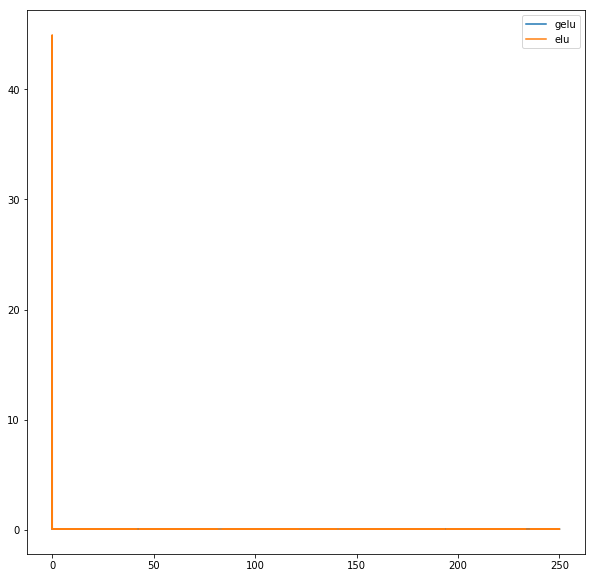

In [135]:
decay = 0.1
start = 1
plt.figure(figsize=(10,10))
data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='train')
plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2])
# data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
# plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2])
data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2])
# plt.yscale('log', nonposy='clip')
# plt.ylim((0.00,.02))
plt.legend(['gelu', 'elu', 'relu'])

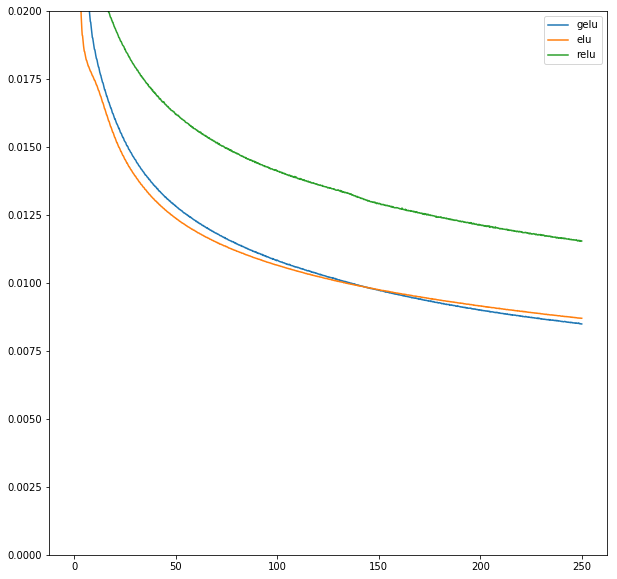

In [63]:
decay = 0.1
start = 16
plt.figure(figsize=(10,10))
data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='test')
plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2])
data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2])
data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2])
# plt.yscale('log', nonposy='clip')
plt.ylim((0.00,.02))
plt.legend(['gelu', 'elu', 'relu'])

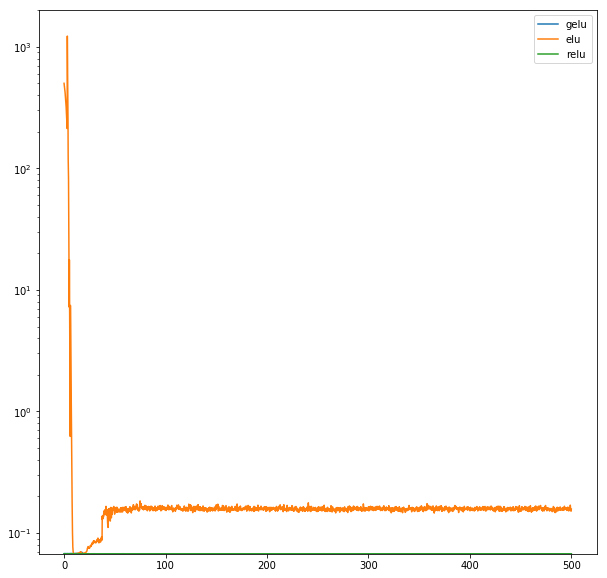

In [319]:
decay = 0.5
start = 1
first_point = 0
plt.figure(figsize=(10,10))
data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
plt.plot(np.linspace(0, 500, len(data[first_point:])), data[first_point:])
data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
plt.plot(np.linspace(0, 500, len(data[first_point:])), data[first_point:])
data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
plt.plot(np.linspace(0, 500, len(data[first_point:])), data[first_point:])
plt.yscale('log', nonposy='clip')
plt.legend(['gelu', 'elu', 'relu'])

In [51]:
len(data)

468500

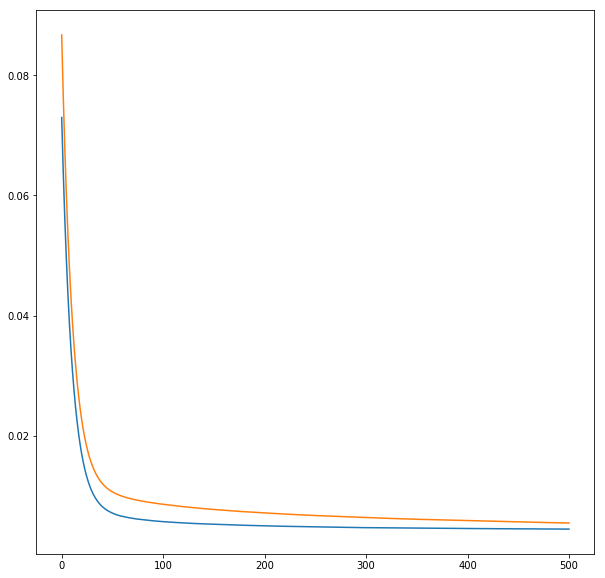

In [49]:
data = get_median_curve(gelu_data, decay = 0.95, number_to_merge=5, mode='test')
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 500, len(data[10:1000])), data[10:1000])
data = get_median_curve(elu_data, decay = 0.95, number_to_merge=5, mode='test')
plt.plot(np.linspace(0, 500, len(data[10:1000])), data[10:1000])

3000

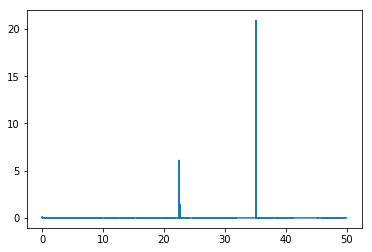

In [39]:
unsmoothed = relu_data['train' + '_' + 'loss' + str(1)]
plt.plot(np.linspace(0, 50, len(unsmoothed)), unsmoothed)

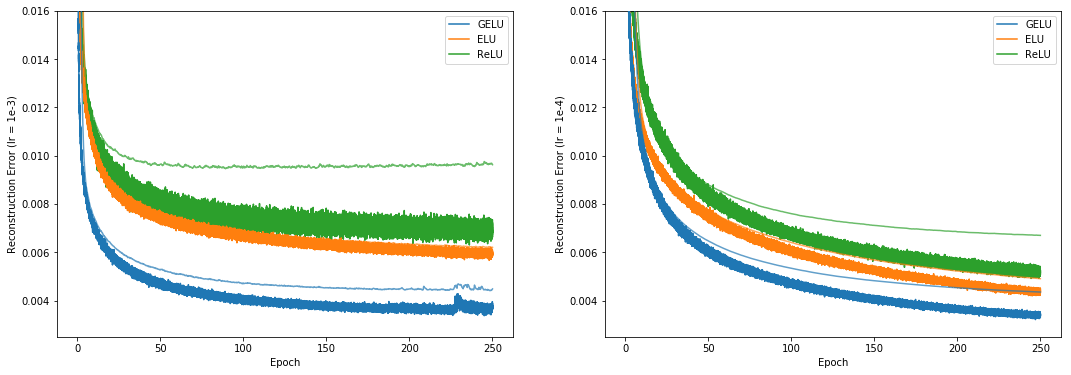

In [156]:
with PdfPages('mnist-ae.pdf') as pdf:
    fig = plt.figure(figsize=(18,6),dpi=600)
    
    plt.subplot(1,2,1)

    decay = 0.8
    start = 6
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=3)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=2)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=1)
    
    plt.gca().set_prop_cycle(None)
    
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=3, alpha=0.7)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=2, alpha=0.7)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=1, alpha=0.7)
    plt.ylim((0.0025,.016))
    plt.legend(['GELU', 'ELU', 'ReLU'])
    plt.xlabel('Epoch')
    plt.ylabel('Reconstruction Error (lr = 1e-3)')
    
    
    plt.subplot(1,2,2)
    
    decay = 0.8
    start = 11
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=3)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=2)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=1)
    
    plt.gca().set_prop_cycle(None)
    
    decay = 0.9
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=3, alpha=0.7)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=2, alpha=0.7)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=1, alpha=0.7)
    plt.ylim((0.0025,.016))
    plt.legend(['GELU', 'ELU', 'ReLU'])
    plt.xlabel('Epoch')
    plt.ylabel('Reconstruction Error (lr = 1e-4)')    
    
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

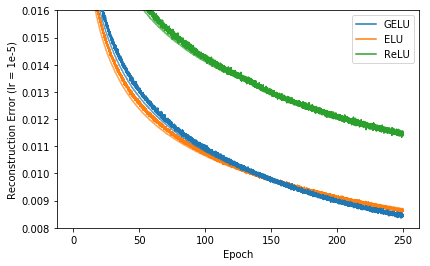

In [158]:
with PdfPages('mnist-ae-appendix.pdf') as pdf:
    fig = plt.figure(figsize=(6.5,4),dpi=600)
    
    decay = 0.99
    start = 16
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='train')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=3)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=2)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=1)
    
    plt.gca().set_prop_cycle(None)
    
    decay = 0.1
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='test')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=3, alpha=0.7)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=2, alpha=0.7)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='test')
    plt.plot(np.linspace(0, 250, len(data)//2), data[:len(data)//2], zorder=1, alpha=0.7)
    plt.ylim((0.008,.016))
    plt.legend(['GELU', 'ELU', 'ReLU'])
    plt.xlabel('Epoch')
    plt.ylabel('Reconstruction Error (lr = 1e-5)')
    
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

In [146]:
gelu_data = pickle.load(open("./data/timit_fcn_gelu.p", "rb"))
elu_data = pickle.load(open("./data/timit_fcn_elu.p", "rb"))
relu_data = pickle.load(open("./data/timit_fcn_relu.p", "rb"))

In [154]:
relu_data['val_loss1']

[10.756344108581542,
 1.951727466583252,
 1.9133564281463622,
 1.810339436531067,
 1.951693058013916,
 2.0843754911422732,
 2.0599277877807616,
 2.0380871677398682,
 1.9684509706497193,
 2.0831957101821899,
 2.0524559831619262,
 2.0203820562362669,
 2.0584218692779541,
 1.9309952592849731,
 1.9762915515899657,
 1.840093069076538,
 1.8738651609420776,
 1.8906318902969361,
 1.8207091188430786,
 1.9325646591186523,
 1.7359072160720825,
 1.7820028924942017,
 1.7524861097335815,
 1.6951197624206542,
 1.7240297222137451,
 1.7014743852615357,
 1.6733267927169799,
 1.6347679662704468,
 1.6139513254165649,
 1.6868759393692017,
 1.6380755472183228,
 1.6379651975631715,
 1.6032964849472047,
 1.5997532939910888,
 1.5994917535781861,
 1.5817064666748046,
 1.5935398769378661,
 1.5744243001937865,
 1.5814221286773682,
 1.5605338668823243,
 1.5558978462219237,
 1.5919894742965699,
 1.5730153512954712,
 1.5786988258361816,
 1.5635000276565552,
 1.5480241346359254,
 1.5404781436920165,
 1.53184696674346

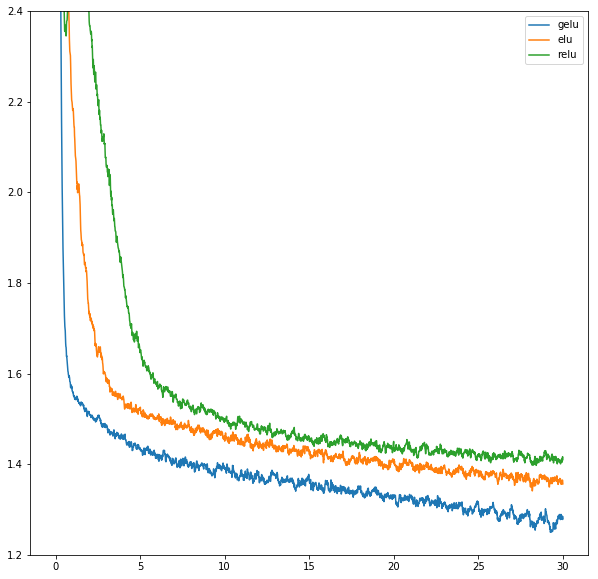

In [47]:
decay = 0.9
start = 1
first_point = 0
data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 30, len(data[first_point:])), data[first_point:])
data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
plt.plot(np.linspace(0, 30, len(data[first_point:])), data[first_point:])
data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
plt.plot(np.linspace(0, 30, len(data[first_point:])), data[first_point:])
plt.ylim((1.2,2.4))
plt.legend(['gelu', 'elu', 'relu'])

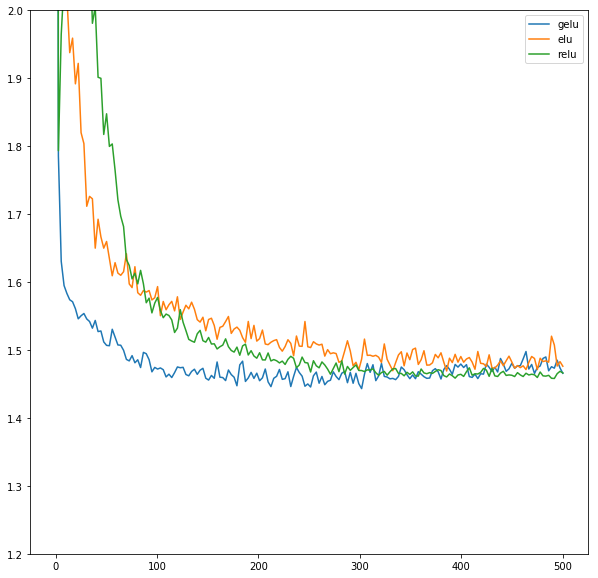

In [48]:
decay = 0.0
start = 1
first_point = 0
data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='loss')
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 500, len(data[first_point:])), data[first_point:])
data = get_median_curve(elu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='loss')
plt.plot(np.linspace(0, 500, len(data[first_point:])), data[first_point:])
data = get_median_curve(relu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='loss')
plt.plot(np.linspace(0, 500, len(data[first_point:])), data[first_point:])
plt.ylim((1.2,2))
plt.legend(['gelu', 'elu', 'relu'])

In [49]:
start = 1
data = get_median_curve(gelu_data, decay = 0, number_to_merge=3, start_key=start, mode='val', metric='err')
best = np.argmin(data)
print('Val perf', data[best])
data = get_median_curve(gelu_data, decay = 0, number_to_merge=3, start_key=start, mode='test', metric='err')
print(data[best])

data = get_median_curve(elu_data, decay = 0, number_to_merge=3, start_key=start, mode='val', metric='err')
best = np.argmin(data)
print('Val perf', data[best])
data = get_median_curve(elu_data, decay = 0, number_to_merge=3, start_key=start, mode='test', metric='err')
print(data[best])

data = get_median_curve(relu_data, decay = 0, number_to_merge=4, start_key=start, mode='val', metric='err')
best = np.argmin(data)
print('Val perf', data[best])
data = get_median_curve(relu_data, decay = 0, number_to_merge=4, start_key=start, mode='test', metric='err')
print(data[best])


Val perf 0.295578904152
0.292930305004
Val perf 0.297096290588
0.295543782413
Val perf 0.297676028609
0.294592700899


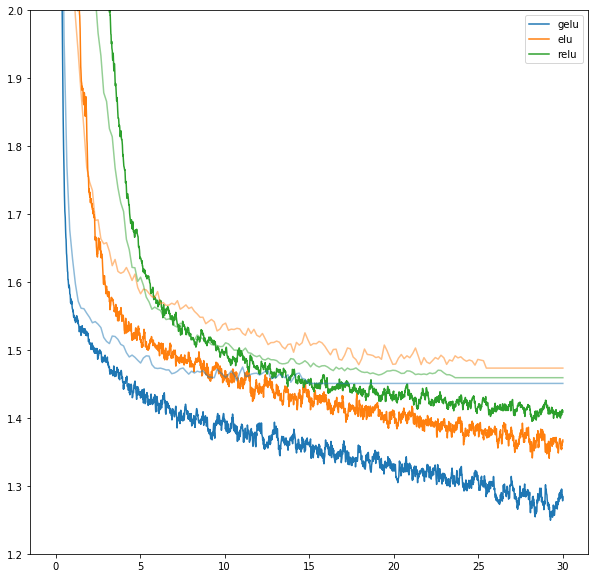

In [71]:
decay = 0.9
start = 1
first_point = 0
data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='train')
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 30, len(data[first_point:])), data[first_point:])
data = get_median_curve(elu_data, decay = decay, number_to_merge=3, start_key=start, mode='train')
plt.plot(np.linspace(0, 30, len(data[first_point:])), data[first_point:])
data = get_median_curve(relu_data, decay = decay, number_to_merge=4, start_key=start, mode='train')
plt.plot(np.linspace(0, 30, len(data[first_point:])), data[first_point:])

plt.gca().set_prop_cycle(None)

decay = 0.5
start = 1
first_point = 0
data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='loss')

flag = False
min_data = np.min(data)
for i in range(len(data)):
    if abs(data[i] - min_data) < 1e-9:
        flag = True
    if flag:
        data[i] = min_data

plt.plot(np.linspace(0, 30, len(data[first_point:])), data[first_point:], alpha=0.5)
data = get_median_curve(elu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='loss')

flag = False
min_data = np.min(data)
for i in range(len(data)):
    if abs(data[i] - min_data) < 1e-9:
        flag = True
    if flag:
        data[i] = min_data

plt.plot(np.linspace(0, 30, len(data[first_point:])), data[first_point:], alpha=0.5)
data = get_median_curve(relu_data, decay = decay, number_to_merge=4, start_key=start, mode='test', metric='loss')

flag = False
min_data = np.min(data)
for i in range(len(data)):
    if abs(data[i] - min_data) < 1e-9:
        flag = True
    if flag:
        data[i] = min_data

plt.plot(np.linspace(0, 30, len(data[first_point:])), data[first_point:], alpha=0.5)
plt.ylim((1.2,2))
plt.legend(['gelu', 'elu', 'relu'])

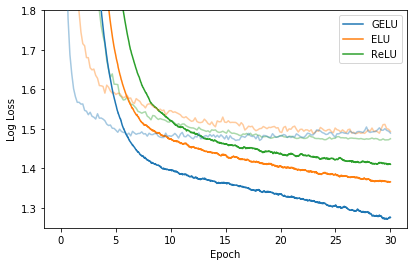

In [74]:
with PdfPages('timit.pdf') as pdf:
    fig = plt.figure(figsize=(6.5, 4))

    decay = 0.99
    start = 1
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 30, len(data)), data, zorder=3)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 30, len(data)), data, zorder=2)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='train')
    plt.plot(np.linspace(0, 30, len(data)), data, zorder=1)
    
    plt.gca().set_prop_cycle(None)
    
    decay = 0.5
    start = 1
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=5, start_key=start, mode='val')
    
    plt.plot(np.linspace(0, 30, len(data)), data, zorder=3, alpha=0.4)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=5, start_key=start, mode='val')

    
    plt.plot(np.linspace(0, 30, len(data)), data, zorder=2, alpha=0.4)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=5, start_key=start, mode='val')
    
    plt.plot(np.linspace(0, 30, len(data)), data, zorder=1, alpha=0.4)
    plt.ylim((1.25,1.8))
    plt.legend(['GELU', 'ELU', 'ReLU'])
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

In [78]:
gelu_data.keys()

dict_keys(['val_err12', 'val_loss5', 'val_loss14', 'test_err9', 'test_err1', 'val_err11', 'train_err11', 'train_err15', 'train_loss4', 'test_loss1', 'test_err4', 'train_err1', 'test_err3', 'val_loss8', 'test_err11', 'train_loss13', 'test_loss13', 'lr4', 'test_err13', 'val_err5', 'val_err6', 'val_err13', 'test_err12', 'train_loss6', 'test_loss11', 'lr2', 'test_loss10', 'lr11', 'test_err2', 'train_err14', 'train_loss12', 'lr15', 'lr12', 'train_loss15', 'val_loss4', 'val_loss2', 'test_err7', 'train_loss14', 'train_err5', 'train_loss8', 'val_err15', 'test_err8', 'train_loss9', 'test_err14', 'val_err2', 'train_loss11', 'test_loss6', 'test_loss3', 'lr10', 'train_err12', 'train_loss3', 'lr13', 'val_loss7', 'test_loss8', 'lr3', 'train_loss1', 'val_loss11', 'val_err4', 'lr6', 'train_err13', 'val_loss12', 'val_err7', 'train_loss10', 'train_err2', 'test_loss12', 'train_loss5', 'lr5', 'val_err9', 'val_loss10', 'lr14', 'lr9', 'test_loss4', 'val_loss15', 'train_loss7', 'test_loss15', 'test_loss2', '

In [91]:
gelu1 = np.load("./data/gelu1.npy")*100
gelu2 = np.load("./data/gelu2.npy")*100
gelu3 = np.load("./data/gelu3.npy")*100
gelu_data = {'train_err1': gelu1[:,0], 'train_err2': gelu2[:,0], 'train_err3': gelu3[:,0],
             'test_err1': gelu1[:,1], 'test_err2': gelu2[:,1], 'test_err3': gelu3[:,1]}

elu1 = np.load("./data/elu1.npy")*100
elu2 = np.load("./data/elu2.npy")*100
elu3 = np.load("./data/elu3.npy")*100

elu_data = {'train_err1': elu1[:,0], 'train_err2': elu2[:,0], 'train_err3': elu3[:,0],
             'test_err1': elu1[:,1], 'test_err2': elu2[:,1], 'test_err3': elu3[:,1]}

relu1 = np.load("./data/relu1.npy")*100
relu2 = np.load("./data/relu2.npy")*100
relu3 = np.load("./data/relu3.npy")*100

relu_data = {'train_err1': relu1[:,0], 'train_err2': relu2[:,0], 'train_err3': relu3[:,0],
             'test_err1': relu1[:,1], 'test_err2': relu2[:,1], 'test_err3': relu3[:,1]}

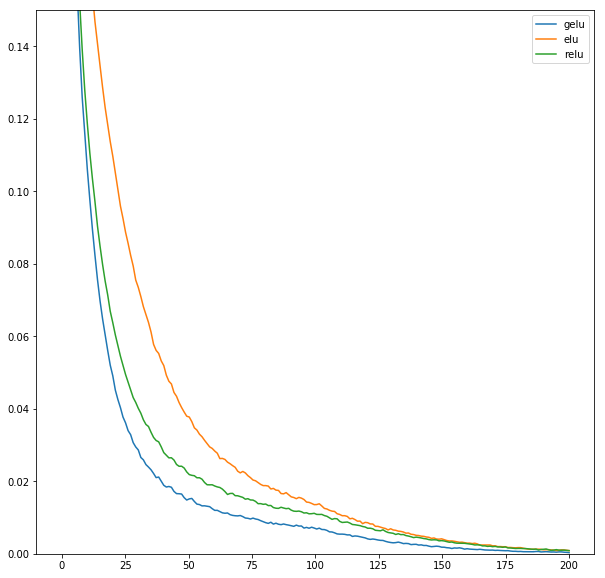

In [86]:
decay = 0.5
start = 1
data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='train', metric='err')
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 200, len(data)), data)
data = get_median_curve(elu_data, decay = decay, number_to_merge=3, start_key=start, mode='train', metric='err')
plt.plot(np.linspace(0, 200, len(data)), data)
data = get_median_curve(relu_data, decay = decay, number_to_merge=3, start_key=start, mode='train', metric='err')
plt.plot(np.linspace(0, 200, len(data)), data)
plt.ylim((0,.15))
plt.legend(['gelu', 'elu', 'relu'])

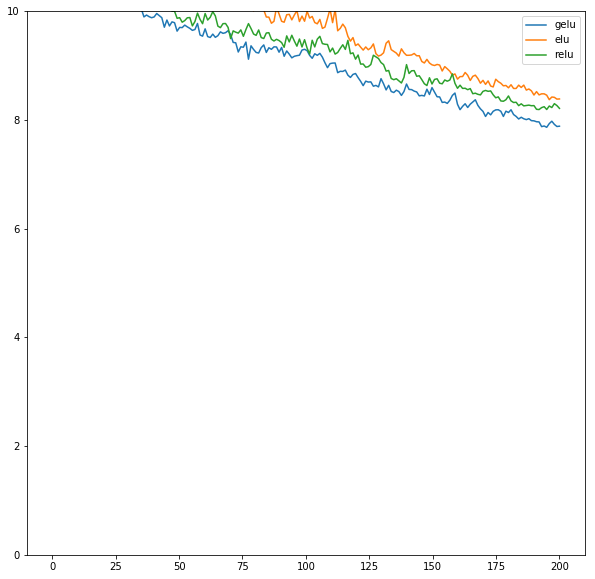

In [92]:
decay = 0.5
start = 1
data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='err')
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 200, len(data)), data)
data = get_median_curve(elu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='err')
plt.plot(np.linspace(0, 200, len(data)), data)
data = get_median_curve(relu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='err')
plt.plot(np.linspace(0, 200, len(data)), data)
plt.ylim((0,10))
plt.legend(['gelu', 'elu', 'relu'])

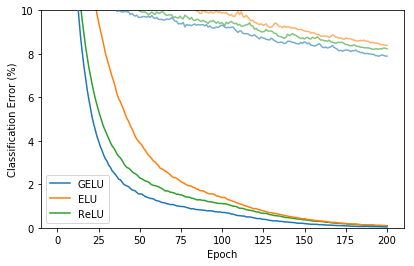

In [100]:
with PdfPages('c10.pdf') as pdf:
    fig = plt.figure(figsize=(6.5, 4))

    decay = 0.7
    start = 1
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='train', metric='err')
    plt.plot(np.linspace(0, 200, len(data)), data, zorder=3)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=3, start_key=start, mode='train', metric='err')
    plt.plot(np.linspace(0, 200, len(data)), data, zorder=2)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=3, start_key=start, mode='train', metric='err')
    plt.plot(np.linspace(0, 200, len(data)), data, zorder=1)
    
    plt.gca().set_prop_cycle(None)
    
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='err')
    plt.plot(np.linspace(0, 200, len(data)), data, zorder=3, alpha=0.6)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='err')
    plt.plot(np.linspace(0, 200, len(data)), data, zorder=2, alpha=0.6)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='err')
    plt.plot(np.linspace(0, 200, len(data)), data, zorder=1, alpha=0.6)
    
    plt.ylim((0,10))
    plt.legend(['GELU', 'ELU', 'ReLU'])
    plt.xlabel('Epoch')
    plt.ylabel('Classification Error (%)')
    
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

In [103]:
print(np.median((gelu_data['test_err1'][-1], gelu_data['test_err2'][-1], gelu_data['test_err3'][-1])))
print(np.median((elu_data['test_err1'][-1], elu_data['test_err2'][-1], elu_data['test_err3'][-1])))
print(np.median((relu_data['test_err1'][-1], relu_data['test_err2'][-1], relu_data['test_err3'][-1])))

7.89
8.41
8.16


In [140]:
gelu1 = np.load("./wrn_results/gelu1_wrn.npy")
gelu2 = np.load("./wrn_results/gelu2_wrn.npy")
gelu3 = np.load("./wrn_results/gelu3_wrn.npy")
gelu_data = {'train_loss1': gelu1[:,0], 'train_loss2': gelu2[:,0], 'train_loss3': gelu3[:,0],
             'test_loss1': gelu1[:,1], 'test_loss2': gelu2[:,1], 'test_loss3': gelu3[:,1],
             'test_err1': 100-gelu1[:,2], 'test_err2': 100-gelu2[:,2], 'test_err3': 100-gelu3[:,2]}

elu1 = np.load("./wrn_results/elu1_wrn.npy")
elu2 = np.load("./wrn_results/elu2_wrn.npy")
elu3 = np.load("./wrn_results/elu3_wrn.npy")

elu_data = {'train_loss1': elu1[:,0], 'train_loss2': elu2[:,0], 'train_loss3': elu3[:,0],
            'test_loss1': elu1[:,1], 'test_loss2': elu2[:,1], 'test_loss3': elu3[:,1],
            'test_err1': 100-elu1[:,2], 'test_err2': 100-elu2[:,2], 'test_err3': 100-elu3[:,2]}

relu1 = np.load("./wrn_results/relu1_wrn.npy")
relu2 = np.load("./wrn_results/relu2_wrn.npy")
relu3 = np.load("./wrn_results/relu3_wrn.npy")

relu_data = {'train_loss1': relu1[:,0], 'train_loss2': relu2[:,0], 'train_loss3': relu3[:,0],
             'test_loss1': relu1[:,1], 'test_loss2': relu2[:,1], 'test_loss3': relu3[:,1],
             'test_err1': 100-relu1[:,2], 'test_err2': 100-relu2[:,2], 'test_err3': 100-relu3[:,2]}

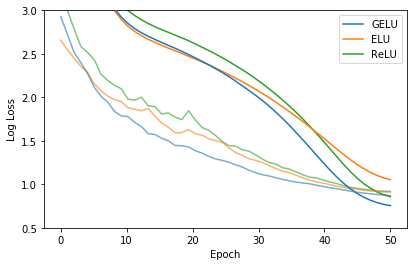

In [145]:
with PdfPages('c100.pdf') as pdf:
    fig = plt.figure(figsize=(6.5, 4))

    decay = 0.7
    start = 1
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='train', metric='loss')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=3)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=3, start_key=start, mode='train', metric='loss')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=2)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=3, start_key=start, mode='train', metric='loss')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=1)
    
    plt.gca().set_prop_cycle(None)
    
    data = get_median_curve(gelu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='loss')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=3, alpha=0.6)
    data = get_median_curve(elu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='loss')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=2, alpha=0.6)
    data = get_median_curve(relu_data, decay = decay, number_to_merge=3, start_key=start, mode='test', metric='loss')
    plt.plot(np.linspace(0, 50, len(data)), data, zorder=1, alpha=0.6)
    
    plt.ylim((0.5,3.0))
#     plt.ylim((0.5,5))
    plt.legend(['GELU', 'ELU', 'ReLU'])
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

In [128]:
print(np.median((gelu_data['test_err1'][-1], gelu_data['test_err2'][-1], gelu_data['test_err3'][-1])))
print(np.median((elu_data['test_err1'][-1], elu_data['test_err2'][-1], elu_data['test_err3'][-1])))
print(np.median((relu_data['test_err1'][-1], relu_data['test_err2'][-1], relu_data['test_err3'][-1])))

20.74
22.98
21.77


In [6]:
train1, train2 = gelu_data['train_loss1'], gelu_data['train_loss2']
train1 = (np.array(train1) + np.array(train2))/2.

In [21]:
ema_list = []
ema = 2.3  # - log(0.1)
for pt in train1:
    ema = 0.99 * ema + 0.01 * pt
    ema_list.append(ema)

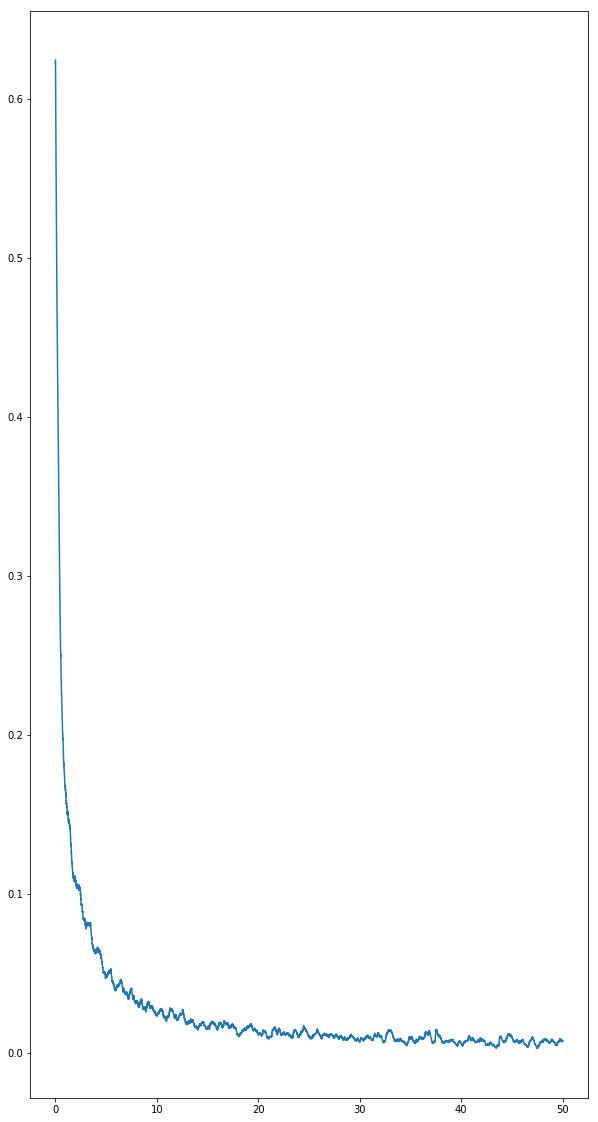

In [22]:
plt.figure(figsize=(10,20))
plt.plot(np.linspace(0, 50, len(ema_list[250:])), ema_list[250:])